In [1]:
import numpy as np

# import functions from modsim

from modsim import *

import random
import matplotlib.pyplot as plt

In [2]:
def generate_polygon_points(n):
    """Makes a polygon with n sides.
    
    n: number of sides
    
    returns: sequence of (x, y) points
    """
    points = []
    size = 5.0
    theta = [np.random.uniform(0, 2*np.pi) for i in range(n)]
    theta.sort()
    for i in range(n):
        x = size*np.cos(theta[i])
        y = size*np.sin(theta[i])
        points.append(State(x=x, y=y))
    return points

def make_polygon(n):
    pointList = generate_polygon_points(n)
    my_polygon = System(pointList=pointList)
    return my_polygon

def generate_regular_polygon_points(n):
    """Makes a regular polygon with n sides.
    
    n: number of sides
    
    returns: sequence of (x, y) points
    """
    points = []
    size = 5.0
    theta = [2*np.pi*i/n for i in range(n)]
    for i in range(n):
        x = size*np.cos(theta[i])
        y = size*np.sin(theta[i])
        points.append(State(x=x, y=y))
    return points

def make_regular_polygon(n):
    pointList = generate_regular_polygon_points(n)
    my_polygon = System(pointList=pointList)
    return my_polygon


In [3]:
def new_point(polygon, point, fraction=0.5):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    
    returns: State object with new x and y
    """
    
    # choose one of the three points at random
    
    ncorners = len(polygon.pointList)
    i = random.randint(1,ncorners)
    p = polygon.pointList[i-1]
        
    # compute the midpoint between the point and the chosen point
    x = (point.x + p.x) * fraction
    y = (point.y + p.y) * fraction
    
    # make a new point with the midpoint
    return State(x=x, y=y)

In [4]:
def run_simulation(polygon, point, n, fraction=0.5):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    n: number of iterations
    
    returns: TimeSeries
    """
    
    #print("Starting point = ",point)
    #print("Triangle = ",triangle)
    #print("Number of iterations = ",n)
    # make a TimeSeries to store the results
    resultsX = TimeSeries()
    resultsY = TimeSeries()
    
    # run n times and store the results
    for i in range(n):
        resultsX[i] = point.x
        resultsY[i] = point.y
        point = new_point(polygon, point, fraction)
        #print(point)
    
    #print("Final point = ",point)

    return resultsX, resultsY

In [5]:
def plot_results(resultsX, resultsY):
    """Plot the results.
    
    results: TimeSeries
    """
    
    plt.plot(resultsX, resultsY, 'b.', label='path')

In [6]:
def do_it(n=3, fraction=0.5, regular=False):

    if regular:
        polygon = make_regular_polygon(n)
    else:
        polygon = make_polygon(n)

    xr = random.uniform(-10,10)
    yr = random.uniform(-10,10)
    point = State(x=xr, y=yr)

    #print ("Triangle = ",triangle)
    #print ("Starting point = ",point)

    resultsX, resultsY = run_simulation(polygon, point, 10000, fraction)

    fig = plt.figure(figsize=(15,15))
    plot_results(resultsX, resultsY)

    maxx = -1000
    minx = 1000
    maxy = -1000
    miny = 1000

    for point in polygon.pointList:
        if point.x > maxx:
            maxx = point.x
        if point.x < minx:
            minx = point.x
        if point.y > maxy:
            maxy = point.y
        if point.y < miny:
            miny = point.y
        
    plt.xlim(minx-1, maxx+1)
    plt.ylim(miny-1, maxy+1)
    plt.xlabel('x')
    plt.ylabel('y')

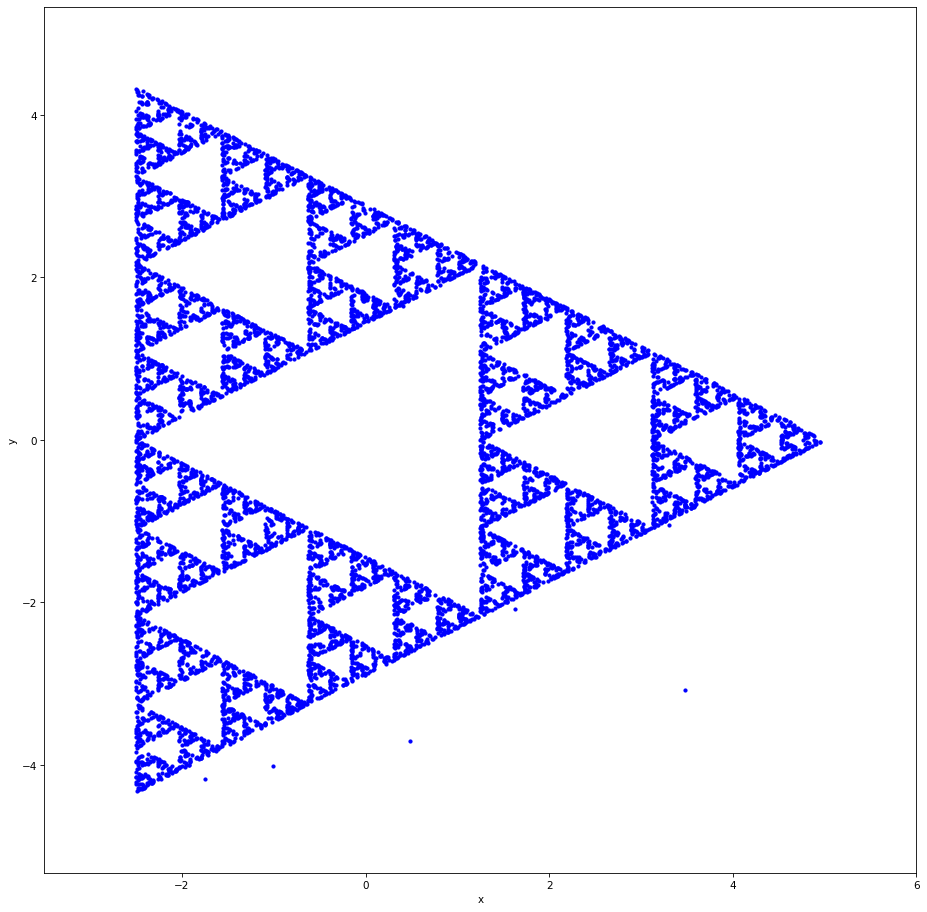

In [7]:
do_it(3, 0.5, True)

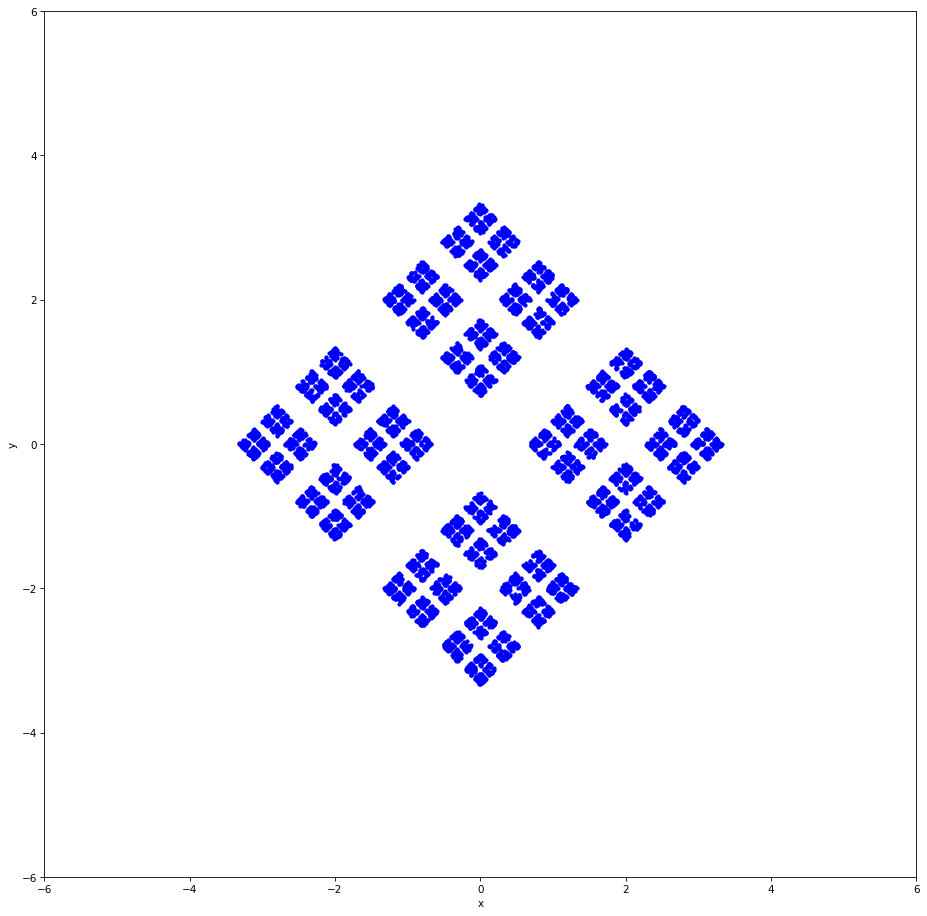

In [9]:
do_it(4,0.4, True)

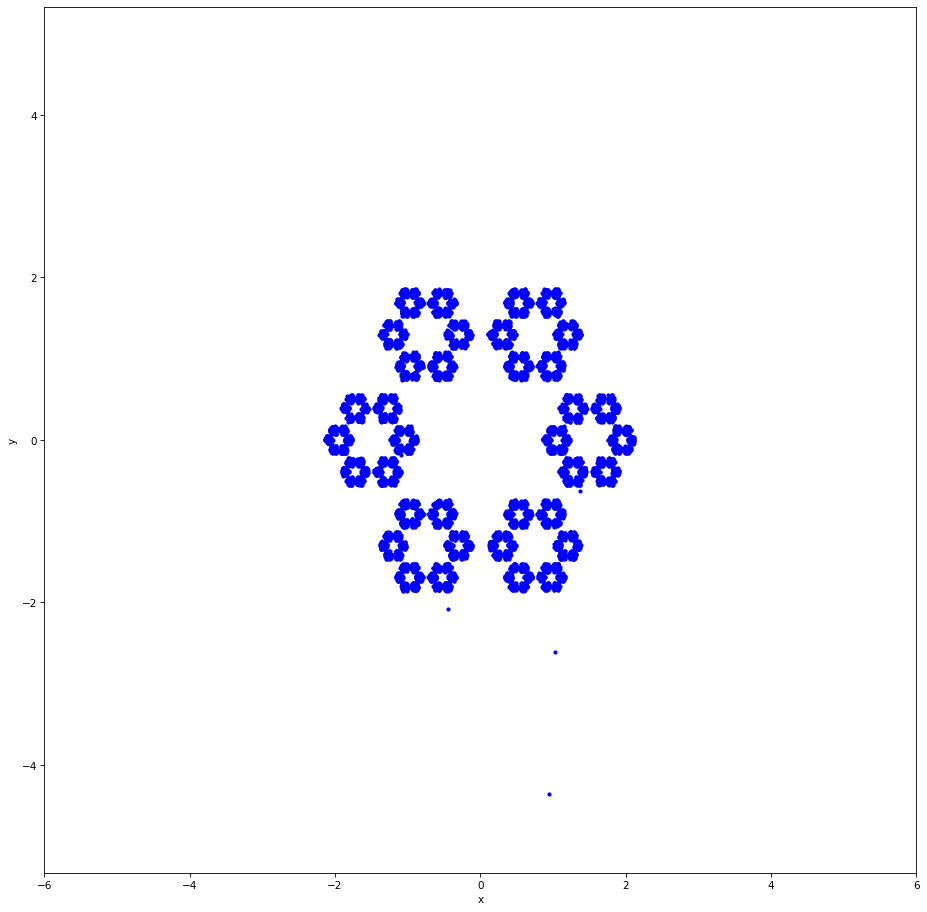

In [33]:
do_it(6,0.3, True)